# Fermi-Pasta-Ulam-Tsingou model
See:
- https://en.wikipedia.org/wiki/Fermi%E2%80%93Pasta%E2%80%93Ulam_problem
- https://arxiv.org/pdf/nlin/0501053.pdf

### The FPU differential equation
Put this cell's content into separate file fpu1.m

In [ ]:
function dy=fpu1(t,y) 
    N=32;
    alpha=0.25; 
    D(N+1)=y(2) -2*y(1)+alpha*((y(2)-y(1))^2-y(1)^2);D(1)=y(N+1); 
    D(2*N)=y(N-1)-2*y(N)+alpha*(y(N)^2-(y(N)-y(N-1))^2);D(N)=y(2*N); 
    for I=2:N-1, 
        D(N+I)=y(I+1)+y(I-1)-2*y(I)+alpha*((y(I+1)-y(I))^2-(y(I)-y(I-1))^2); 
        D(I)=y(N+I); 
    end 
    dy=D';
end


### Set the parameters

In [16]:
N=32; % Number of particles must be a power of 2 
alpha=0.25; % Nonlinear parameter 
TMAX=10000; DT=20; % tmax and Delta t 
tspan=[0:DT:TMAX]; 
options=odeset('Reltol',1e-4,'OutputFcn','odeplot','OutputSel',[1,2,N]); % Test different tolerances, changing Reltol

### Set initial conditions  
Each commented line contain different set of initial conditions

In [17]:
 for I=1:N, 
    a=1; b(I)=a*sin(pi*I/(N+1)); b(I+N)=0; % FPU initial condition 
    %a=1; b(I)=a*sin(pi*N*I/(N+1)); b(I+N)=0; % Zabusky-Deem init. cond. 
    %k=0.8; sk=(sinh(k))^2; ek=exp(-k); i1=I-N/4; i2=i1-N/2; %Solitons 
    %b(I)=-0.5/alpha*log((1+exp(2*k*(i1-1)))/(1+exp(2*k*i1))); 
    %b(I)=b(I)+0.5/alpha*log((1+exp(2*k*(i2-1)))/(1+exp(2*k*i2))); 
    %b(I+N)= sk*ek/alpha/cosh(k*i1)/(exp(-k*i1)+exp(k*i1)*exp(-2*k)); 
    %b(I+N)=b(I+N)-sk*ek/alpha/cosh(k*i2)/(exp(-k*i2)+exp(k*i2)*exp(-2*k)); 
    omegak2(I)=4*(sin(pi*I/2/N))^2; % Mode Frequencies 
end 

### Time integration of the FPU equation

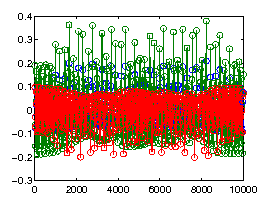

In [43]:
[T,Y]=ode45('fpu1',tspan,b',options,N); % Time integration

In [19]:
for IT=1:(TMAX/DT),
    TIME(IT)=IT*DT*sqrt(omegak2(1))/2/pi; % Time iteration loop 
    YX(IT,1:N+1)=[0 Y(IT,1:N )]; YV(IT,1:N+1)=[0 Y(IT,N+1:2*N )]; 
    sXF(IT,:)=imag(fft([YX(IT,1:N+1) 0 -YX(IT,N+1:-1:2)]))/sqrt(2*(N+1)); 
    sVF(IT,:)=imag(fft([YV(IT,1:N+1) 0 -YV(IT,N+1:-1:2)]))/sqrt(2*(N+1)); 
    Energ(IT,1:N)=(omegak2(1:N).*(sXF(IT,2:N+1).^2)+sVF(IT,2:N+1).^2)/2; 
    for J=2:N-1, % Space loop 
        DifY(IT,J)=Y(IT,J+1)-Y(IT,J); 
    end 
end 

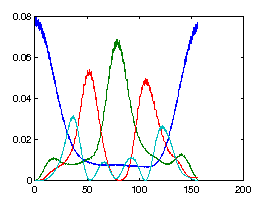

In [44]:
plot(TIME,Energ(:,1),TIME,Energ(:,2),TIME,Energ(:,3),TIME,Energ(:,4)); 

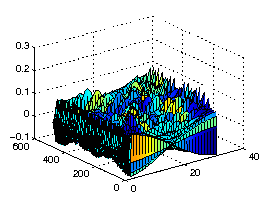

In [45]:
surf(DifY); % Space derivative field to show the soliton dynamics